## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [13]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [14]:
train, test = keras.datasets.cifar10.load_data()

In [15]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [16]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [17]:
   """Code Here
    建立你的神經網路
    """
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [18]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9 
NESTEROV = True


In [19]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.8682 - acc: 0.3328 - val_loss: 1.7461 - val_acc: 0.3743
Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.6470 - acc: 0.4168 - val_loss: 1.6375 - val_acc: 0.4231
Epoch 3/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5563 - acc: 0.4487 - val_loss: 1.6280 - val_acc: 0.4184
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4933 - acc: 0.4708 - val_loss: 1.5274 - val_acc: 0.4498
Epoch 5/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4450 - acc: 0.4854 - val_loss: 1.5391 - val_acc: 0.4449
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3970 - acc: 0.5034 - val_loss: 1.6844 - val_acc: 0.4142
Epoch 7/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.3678 - acc: 0.5148 - val_loss: 1.4216 - 

Epoch 2/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.8720 - acc: 0.3466 - val_loss: 1.8263 - val_acc: 0.3594
Epoch 3/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7965 - acc: 0.3721 - val_loss: 1.7760 - val_acc: 0.3761
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.7494 - acc: 0.3900 - val_loss: 1.7331 - val_acc: 0.3876
Epoch 5/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.7095 - acc: 0.4052 - val_loss: 1.6911 - val_acc: 0.4074
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6778 - acc: 0.4154 - val_loss: 1.6688 - val_acc: 0.4148
Epoch 7/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6494 - acc: 0.4256 - val_loss: 1.6404 - val_acc: 0.4254
Epoch 8/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6235 - acc: 0.4337 - val_loss: 1.6169 - val_acc: 0.4303
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 6s 119us/step - loss: 2.1204 - acc: 0.2370 - val_loss: 2.0924 - val_acc: 0.2440
Epoch 4/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.0728 - acc: 0.2609 - val_loss: 2.0503 - val_acc: 0.2714
Epoch 5/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.0352 - acc: 0.2802 - val_loss: 2.0165 - val_acc: 0.2849
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.0045 - acc: 0.2922 - val_loss: 1.9887 - val_acc: 0.3003
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.9789 - acc: 0.3044 - val_loss: 1.9655 - val_acc: 0.3086
Epoch 8/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9571 - acc: 0.3133 - val_loss: 1.9454 - val_acc: 0.3174
Epoch 9/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.9385 - acc: 0.3207 - val_loss: 1.9279 - val_acc: 0.3202
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 6s 121us/step - loss: 2.2864 - acc: 0.1347 - val_loss: 2.2807 - val_acc: 0.1398
Epoch 5/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.2729 - acc: 0.1456 - val_loss: 2.2681 - val_acc: 0.1496
Epoch 6/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.2613 - acc: 0.1550 - val_loss: 2.2573 - val_acc: 0.1570
Epoch 7/50
50000/50000 [==============================] - 6s 118us/step - loss: 2.2510 - acc: 0.1643 - val_loss: 2.2476 - val_acc: 0.1669
Epoch 8/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.2417 - acc: 0.1731 - val_loss: 2.2385 - val_acc: 0.1761
Epoch 9/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.2329 - acc: 0.1799 - val_loss: 2.2300 - val_acc: 0.1838
Epoch 10/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.2245 - acc: 0.1883 - val_loss: 2.2217 - val_acc: 0.1932
Epoch 11/50
50000/50000 [===================

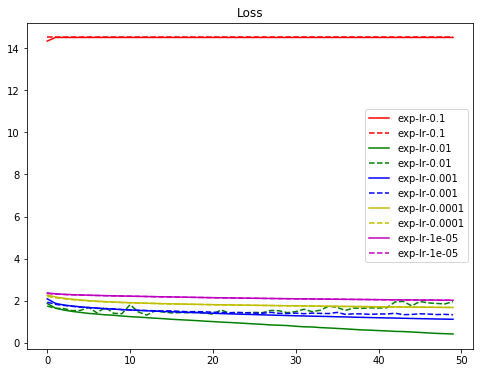

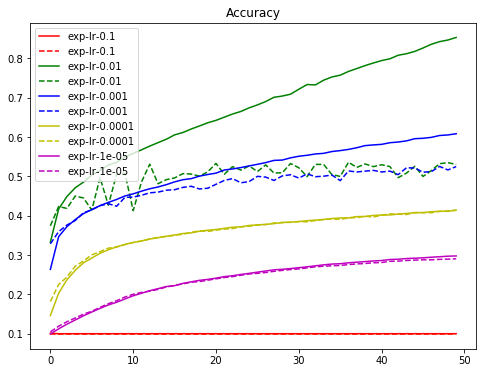

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
